<a href="https://colab.research.google.com/github/20230670/Speech-Recognition/blob/main/music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install kaggle
from google.colab import files
files.upload()    		#kaggle.json upload

#colab 내 kaggle 디렉토리 생성
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

#permission warning 방지
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
!unzip "/content/archive.zip"



Saving kaggle.json to kaggle.json
 99% 1.20G/1.21G [00:14<00:00, 103MB/s] 
100% 1.21G/1.21G [00:14<00:00, 91.0MB/s]
Archive:  /content/archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive.zip or
        /content/archive.zip.zip, and cannot find /content/archive.zip.ZIP, period.


In [15]:
#기본값 확인(메타정보 출력)
import librosa

y , sr = librosa.load('/content/i.wav')
# librosa.load() : 오디오 파일을 로드한다.

print(y)
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f' % (len(y) / sr)) #음악의 길이(초) = 음파의 길이/Sampling rate

[-3.6379788e-12  2.7284841e-12  1.3415047e-11 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
687744
Sampling rate (Hz): 22050
Audio length (seconds): 31.19


In [16]:
#음악 들어보기
import IPython.display as ipd
ipd.Audio(y, rate=sr)

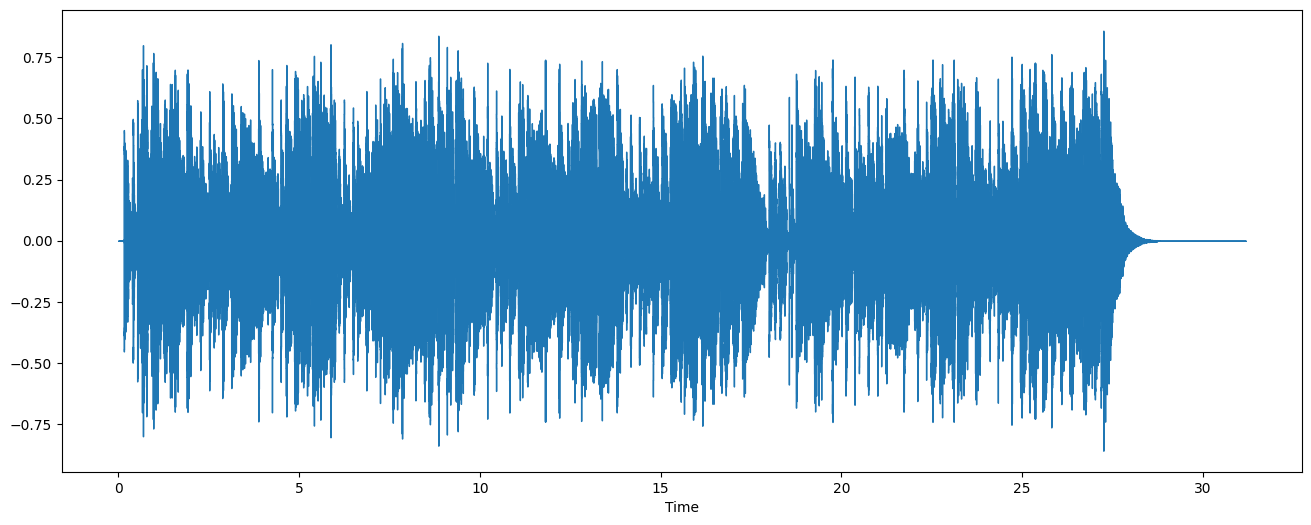

In [18]:
#2D 음파 그래프
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize =(16,6))
librosa.display.waveshow(y=y,sr=sr)
plt.show()

(1025, 1344)


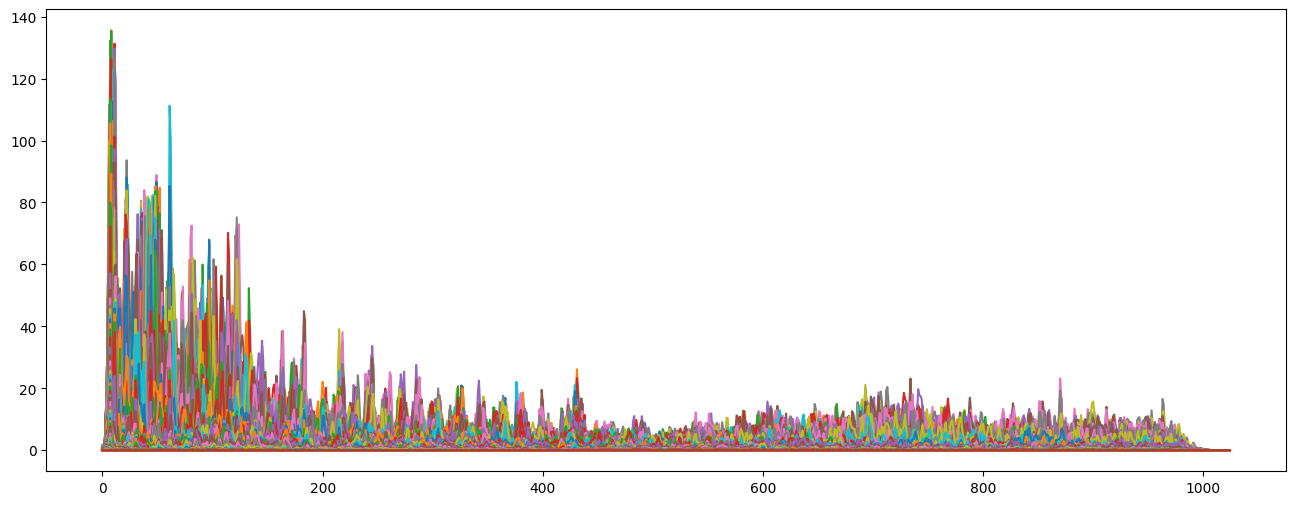

In [19]:
#Fourier Transform(푸리에 변환)
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) #n_fft : window size / 이 때, 음성의 길이를 얼마만큼으로 자를 것인가? 를 window라고 부른다.


print(D.shape)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

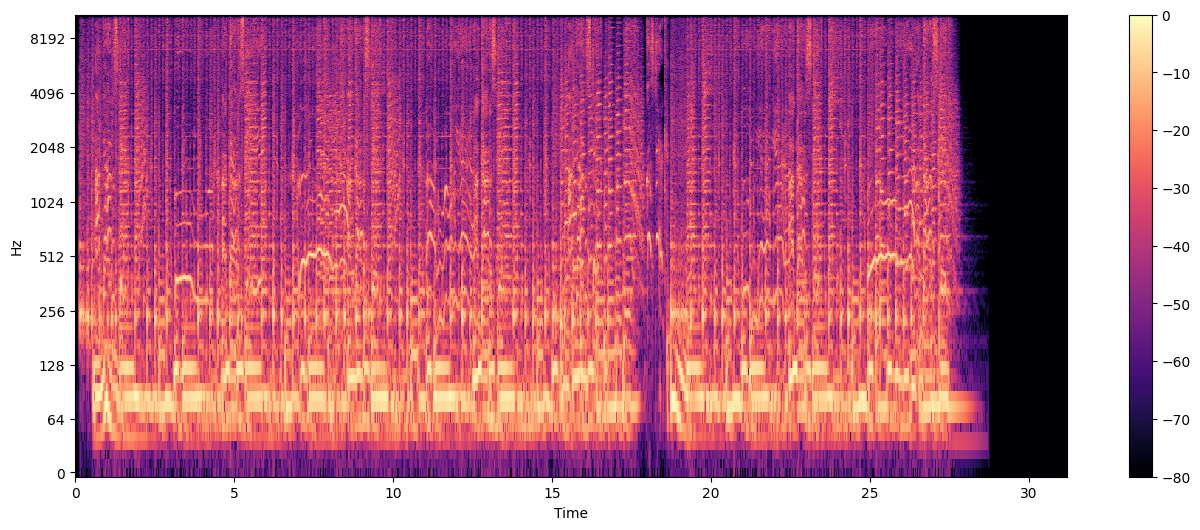

In [20]:
#Spectogram - 시간에 따른 신호 주파수의 스펙트럼 그래프
DB = librosa.amplitude_to_db(D, ref=np.max) #amplitude(진폭) -> DB(데시벨)로 바꿔라

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()